# Assignment No-18-Forecasting

# 1)CocaCola DataSet

# Problem Statement

In [1]:
#importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
import statsmodels.formula.api as smf

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
#Importing DataSet

In [4]:
cocacola=pd.read_csv(r"D:\ExcelR Solution\Data Science\Assignments\Assignment No-18-Forecasting\CocaCola_Sales_Rawdata.csv")

In [5]:
cocacola

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [6]:
len(cocacola)

42

# Data Preprocessing

In [7]:
cocacola.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [8]:
cocacola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [9]:
cocacola.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [10]:
cocacola.isna().sum()

Quarter    0
Sales      0
dtype: int64

In [11]:
cocacola.isnull().any()

Quarter    False
Sales      False
dtype: bool

In [12]:
cocacola.corr()

,Sales
Sales,1.0


In [13]:
cocacola.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
dtype: bool

In [14]:
cocacola.drop_duplicates()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [15]:
quarter = ['Q1','Q2','Q3','Q4']

In [16]:
quarter

['Q1', 'Q2', 'Q3', 'Q4']

In [17]:
len(cocacola)

42

In [18]:
cocacola['quarter'] = 0
for i in range(42):
    p=cocacola['Quarter'][i]
    cocacola['quarter'][i]=p[0:2]

In [19]:
cocacola

,Quarter,Sales,quarter
0,Q1_86,1734.827000,Q1
1,Q2_86,2244.960999,Q2
2,Q3_86,2533.804993,Q3
3,Q4_86,2154.962997,Q4
4,Q1_87,1547.818996,Q1
5,Q2_87,2104.411995,Q2
6,Q3_87,2014.362999,Q3
7,Q4_87,1991.746998,Q4
8,Q1_88,1869.049999,Q1
9,Q2_88,2313.631996,Q2


In [20]:
cocacola['quarter'].value_counts()

Q1    11
Q2    11
Q3    10
Q4    10
Name: quarter, dtype: int64

In [21]:
cocacola_dummies=pd.DataFrame(pd.get_dummies(cocacola['quarter']),columns=['Q1','Q2','Q3','Q4'])
cc=pd.concat([cocacola,cocacola_dummies],axis= 1)

In [22]:
cocacola_dummies

,Q1,Q2,Q3,Q4
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0
5,0,1,0,0
6,0,0,1,0
7,0,0,0,1
8,1,0,0,0
9,0,1,0,0


In [23]:
cc

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,1,0,0,0
1,Q2_86,2244.960999,Q2,0,1,0,0
2,Q3_86,2533.804993,Q3,0,0,1,0
3,Q4_86,2154.962997,Q4,0,0,0,1
4,Q1_87,1547.818996,Q1,1,0,0,0
5,Q2_87,2104.411995,Q2,0,1,0,0
6,Q3_87,2014.362999,Q3,0,0,1,0
7,Q4_87,1991.746998,Q4,0,0,0,1
8,Q1_88,1869.049999,Q1,1,0,0,0
9,Q2_88,2313.631996,Q2,0,1,0,0


In [24]:
cc['t'] = np.arange(1,43)
cc['t_squared'] = cc['t']**2
cc["Sales_log"] =np.log(cocacola['Sales'])

In [25]:
cc

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_squared,Sales_log
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602
5,Q2_87,2104.411995,Q2,0,1,0,0,6,36,7.651791
6,Q3_87,2014.362999,Q3,0,0,1,0,7,49,7.608058
7,Q4_87,1991.746998,Q4,0,0,0,1,8,64,7.596767
8,Q1_88,1869.049999,Q1,1,0,0,0,9,81,7.533186
9,Q2_88,2313.631996,Q2,0,1,0,0,10,100,7.746574


# Data Visualization

<AxesSubplot:>

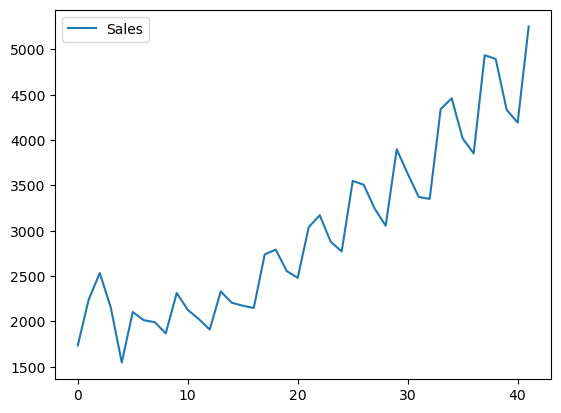

In [26]:
cocacola.plot()

<AxesSubplot:>

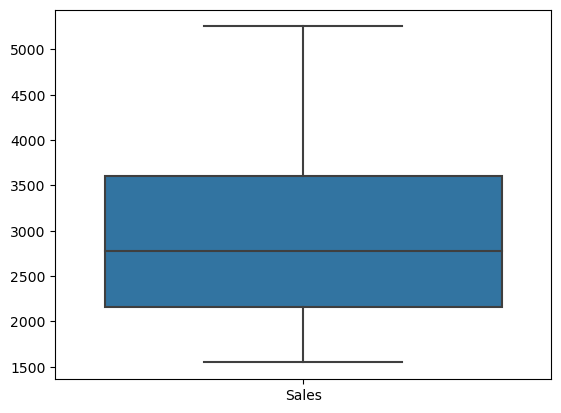

In [27]:
import seaborn as  sns
sns.boxplot(data =cocacola)

array([[<AxesSubplot:title={'center':'Sales'}>]], dtype=object)

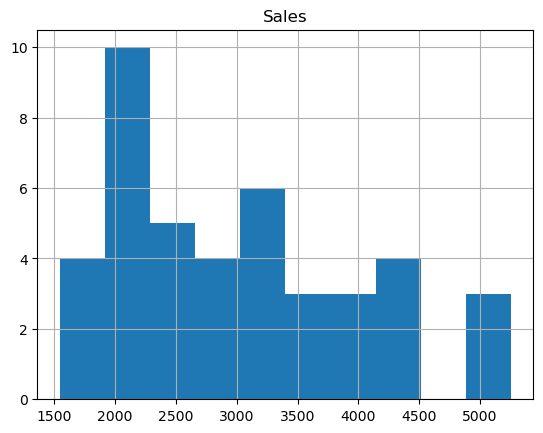

In [28]:
cocacola.hist()

<AxesSubplot:ylabel='Density'>

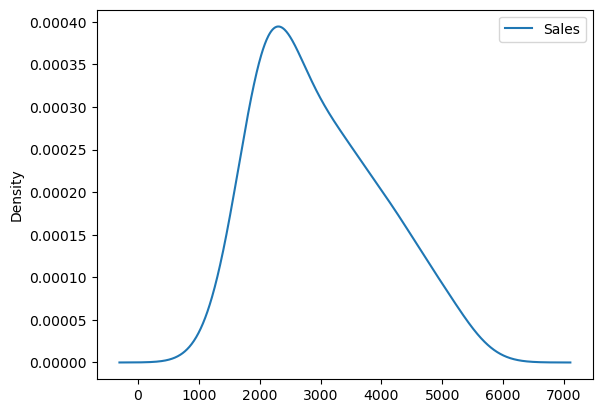

In [29]:
cocacola.plot(kind='kde')

In [30]:
np.array(cocacola["Sales"])

array([1734.827   , 2244.960999, 2533.804993, 2154.962997, 1547.818996,
       2104.411995, 2014.362999, 1991.746998, 1869.049999, 2313.631996,
       2128.32    , 2026.828999, 1910.603996, 2331.164993, 2206.549995,
       2173.967995, 2148.278   , 2739.307999, 2792.753998, 2556.009995,
       2480.973999, 3039.522995, 3172.115997, 2879.000999, 2772.      ,
       3550.      , 3508.      , 3243.859993, 3056.      , 3899.      ,
       3629.      , 3373.      , 3352.      , 4342.      , 4461.      ,
       4017.      , 3854.      , 4936.      , 4895.      , 4333.      ,
       4194.      , 5253.      ])

<AxesSubplot:xlabel='Sales', ylabel='Density'>

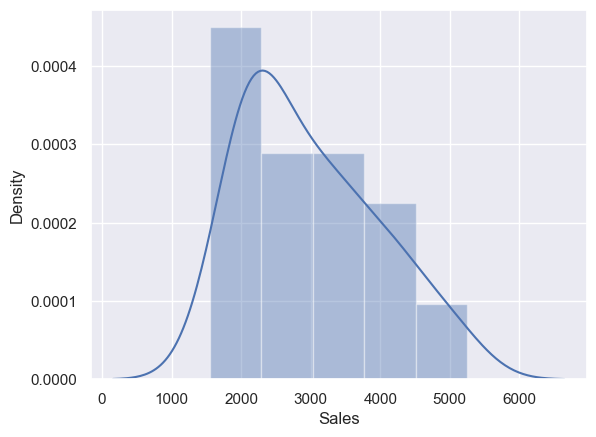

In [31]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_theme()
sns.distplot(cocacola['Sales'],kde=True)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

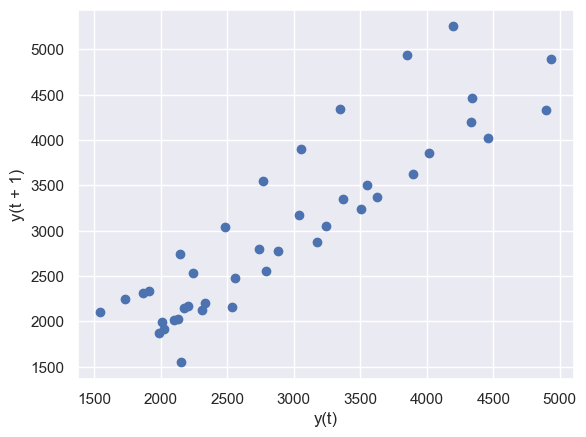

In [32]:
from pandas.plotting import lag_plot
lag_plot(cocacola['Sales'])

In [33]:
cc.head()

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_squared,Sales_log
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602


In [34]:
train =cc.head(32)
test =cc.tail(10)

In [35]:
train

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_squared,Sales_log
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602
5,Q2_87,2104.411995,Q2,0,1,0,0,6,36,7.651791
6,Q3_87,2014.362999,Q3,0,0,1,0,7,49,7.608058
7,Q4_87,1991.746998,Q4,0,0,0,1,8,64,7.596767
8,Q1_88,1869.049999,Q1,1,0,0,0,9,81,7.533186
9,Q2_88,2313.631996,Q2,0,1,0,0,10,100,7.746574


In [36]:
test

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_squared,Sales_log
32,Q1_94,3352.0,Q1,1,0,0,0,33,1089,8.117312
33,Q2_94,4342.0,Q2,0,1,0,0,34,1156,8.376090
34,Q3_94,4461.0,Q3,0,0,1,0,35,1225,8.403128
35,Q4_94,4017.0,Q4,0,0,0,1,36,1296,8.298291
36,Q1_95,3854.0,Q1,1,0,0,0,37,1369,8.256867
37,Q2_95,4936.0,Q2,0,1,0,0,38,1444,8.504311
38,Q3_95,4895.0,Q3,0,0,1,0,39,1521,8.495970
39,Q4_95,4333.0,Q4,0,0,0,1,40,1600,8.374015
40,Q1_96,4194.0,Q1,1,0,0,0,41,1681,8.341410
41,Q2_96,5253.0,Q2,0,1,0,0,42,1764,8.566555


<AxesSubplot:>

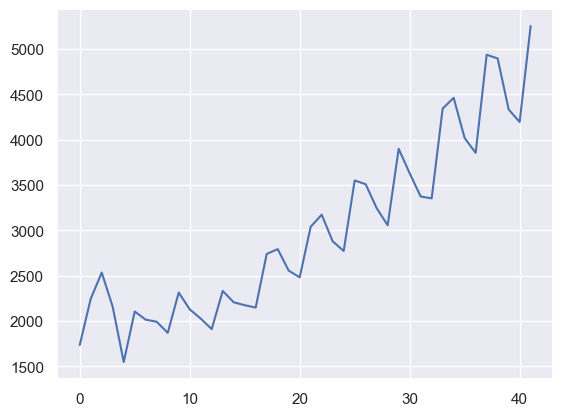

In [37]:
cocacola['Sales'].plot()

<AxesSubplot:xlabel='Sales', ylabel='count'>

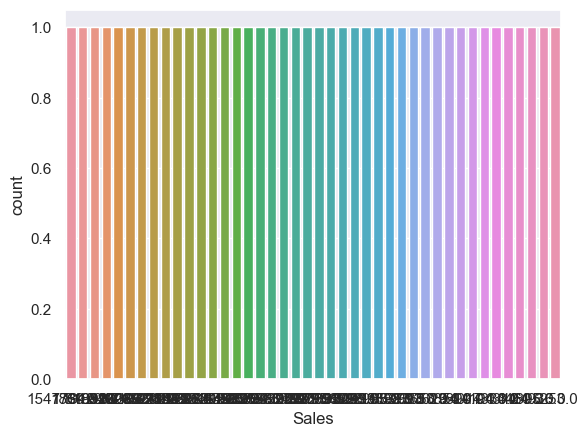

In [38]:
sns.countplot(data=cocacola,x='Sales')

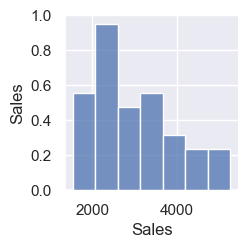

In [39]:
sns.pairplot(data=cocacola)

# Splitting Data

In [40]:
Train=cocacola.head(35)
Test=cocacola.tail(7)

In [41]:
Train

,Quarter,Sales,quarter
0,Q1_86,1734.827000,Q1
1,Q2_86,2244.960999,Q2
2,Q3_86,2533.804993,Q3
3,Q4_86,2154.962997,Q4
4,Q1_87,1547.818996,Q1
5,Q2_87,2104.411995,Q2
6,Q3_87,2014.362999,Q3
7,Q4_87,1991.746998,Q4
8,Q1_88,1869.049999,Q1
9,Q2_88,2313.631996,Q2


In [42]:
Test

,Quarter,Sales,quarter
35,Q4_94,4017.0,Q4
36,Q1_95,3854.0,Q1
37,Q2_95,4936.0,Q2
38,Q3_95,4895.0,Q3
39,Q4_95,4333.0,Q4
40,Q1_96,4194.0,Q1
41,Q2_96,5253.0,Q2


# Moving Average

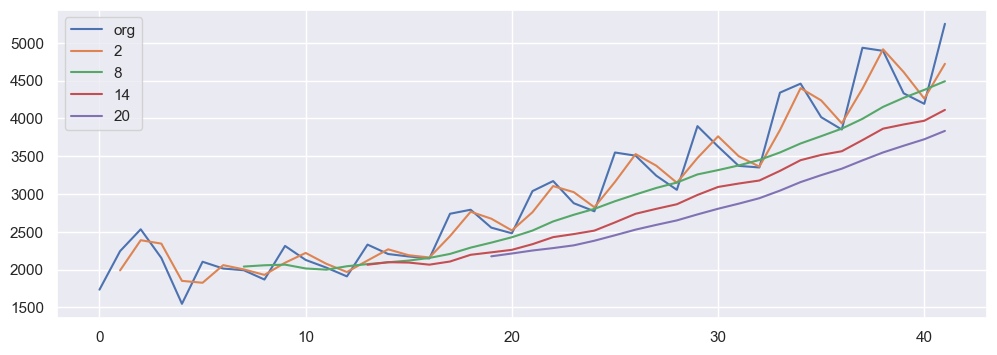

In [43]:
plt.figure(figsize=(12,4))
cocacola.Sales.plot(label="org")
for i in range(2,24,6):
    cocacola["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

# Time series decomposition plot

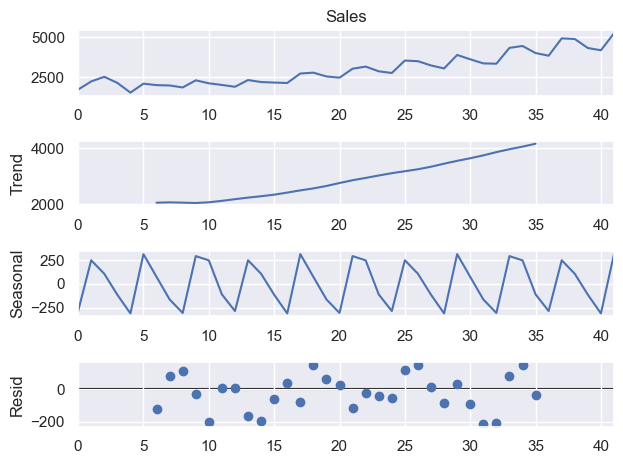

In [44]:
decompose_ts_add = seasonal_decompose(cocacola.Sales,period=12)
decompose_ts_add.plot()
plt.show()

# ACF plots and PACF plots

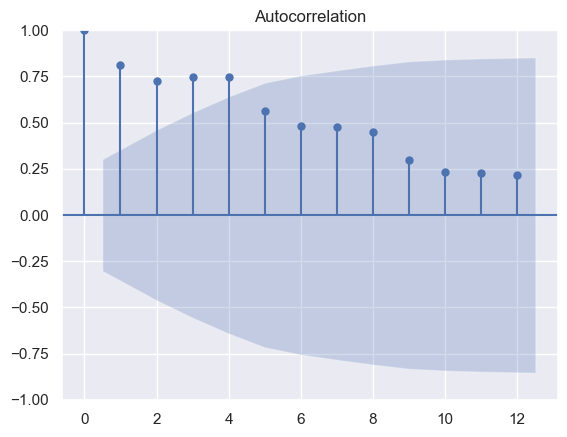

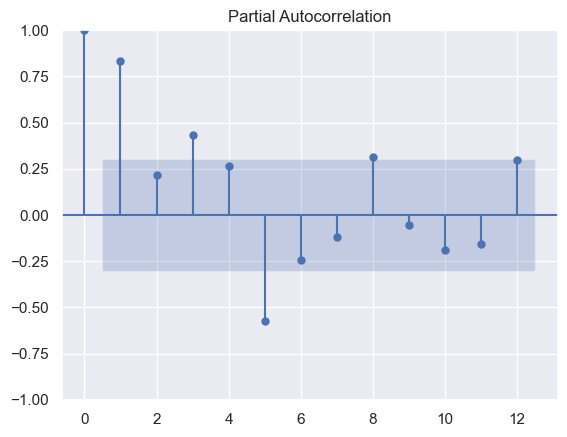

In [45]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(cocacola.Sales,lags=12)
tsa_plots.plot_pacf(cocacola.Sales,lags=12)
plt.show()

# Evaluation Metric MAPE

In [46]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

# Simple Exponential Method

In [47]:
ses_model = SimpleExpSmoothing(Train["Sales"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Sales) 


16.401824944558516

# Holt Method

In [48]:
# Holt method 
hw_model = Holt(Train["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Sales) 

15.891434370123628

In [49]:
hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Sales) 

5.331792657730704

In [50]:
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Sales)

2.5080226504631646

# Final Model by combining train and test

In [51]:
hwe_model_add_add = ExponentialSmoothing(cocacola["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit()

In [52]:
hwe_model_add_add

In [53]:
#Forecasting for next 10 time periods
hwe_model_add_add.forecast(10)

42    5047.813012
43    4924.233631
44    4900.458295
45    5602.512645
46    5647.081747
47    5393.433243
48    5317.598998
49    6054.418661
50    6100.274041
51    5848.592568
dtype: float64

# Transformations

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

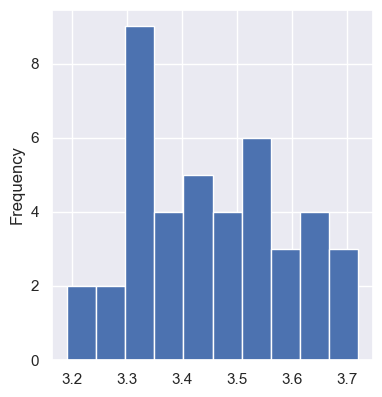

In [55]:
## log transformation - power law distribution ##
log_var = ['Sales']
fig = plt.figure(figsize = (24,10))

for j in range(len(log_var)):
    var = log_var[j]
    transformed = "log_" + var
    cocacola[transformed] = np.log10(cocacola[var]+1)
    sub = fig.add_subplot(2, 5, j + 1)
    cocacola[transformed].plot(kind = 'hist')

count      42.000000
mean     2994.353308
std       977.930896
min      1547.818996
25%      2159.714247
50%      2782.376999
75%      3609.250000
max      5253.000000
Name: Sales, dtype: float64
count      42.000000
mean     2994.295858
std       939.089093
min      1871.127699
25%      2159.714247
50%      2782.376999
75%      3609.250000
max      4873.300000
Name: clipped_Sales, dtype: float64


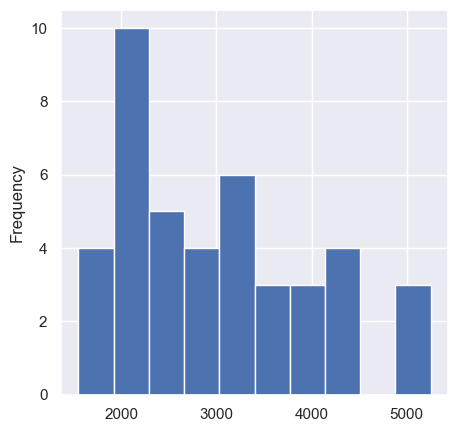

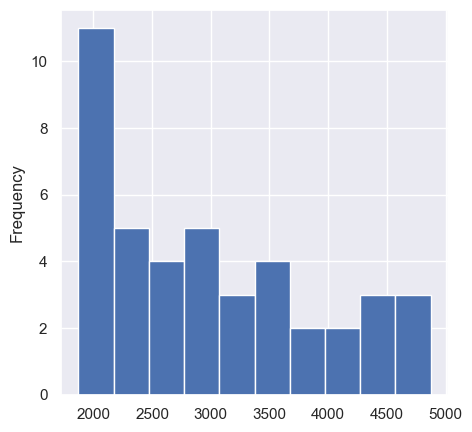

In [56]:
## clipping methods - handle outliers ##
clip_var = ['Sales']
for i in clip_var:
    transformed = 'clipped_'+ i
# upper limit - .95 quantile
    upper_limit = cocacola[i].quantile(0.95)
# lower limit - .05 quantile
    lower_limit = cocacola[i].quantile(0.05)
    cocacola[transformed] = cocacola[i].clip(lower_limit, upper_limit, axis = 0)
    
    print(cocacola[i].describe())
    print(cocacola[transformed].describe())
    
    plt.figure(figsize = (5,5))
    cocacola[i].plot(kind = 'hist')
    
    plt.figure(figsize = (5,5))
    cocacola[transformed].plot(kind = 'hist')

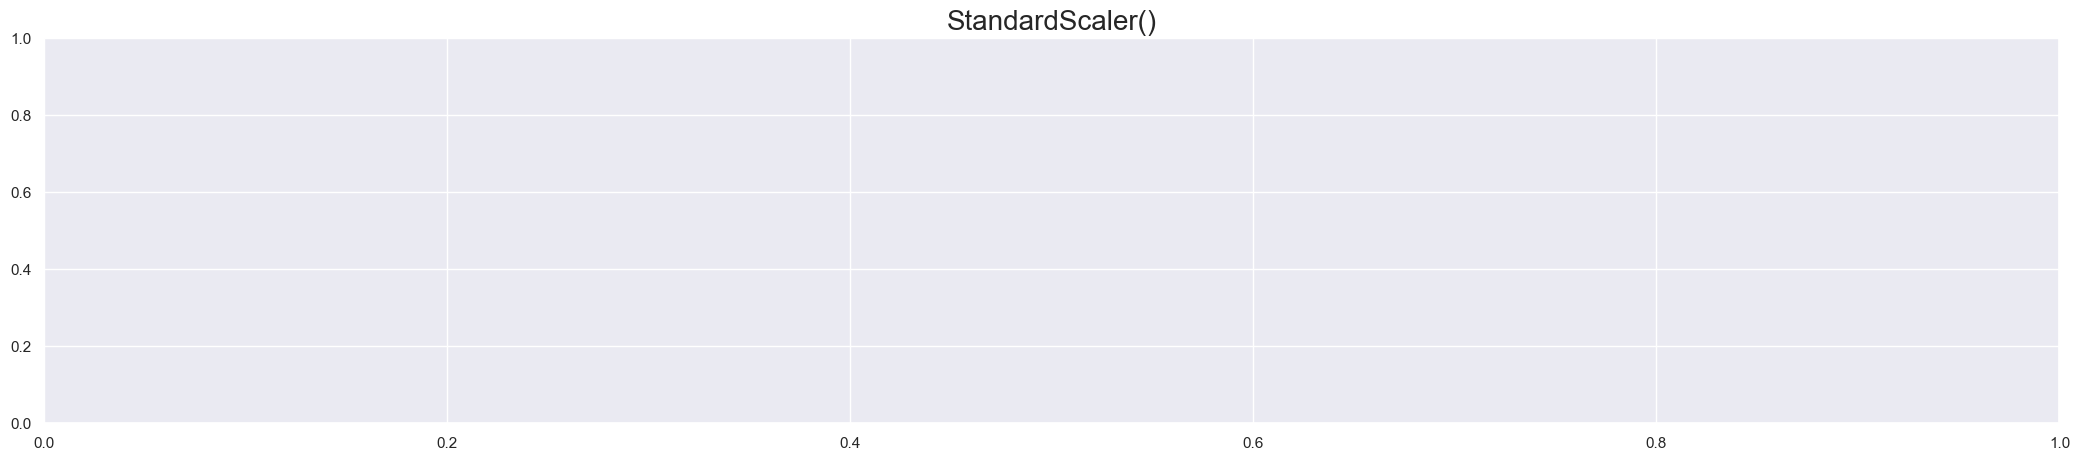

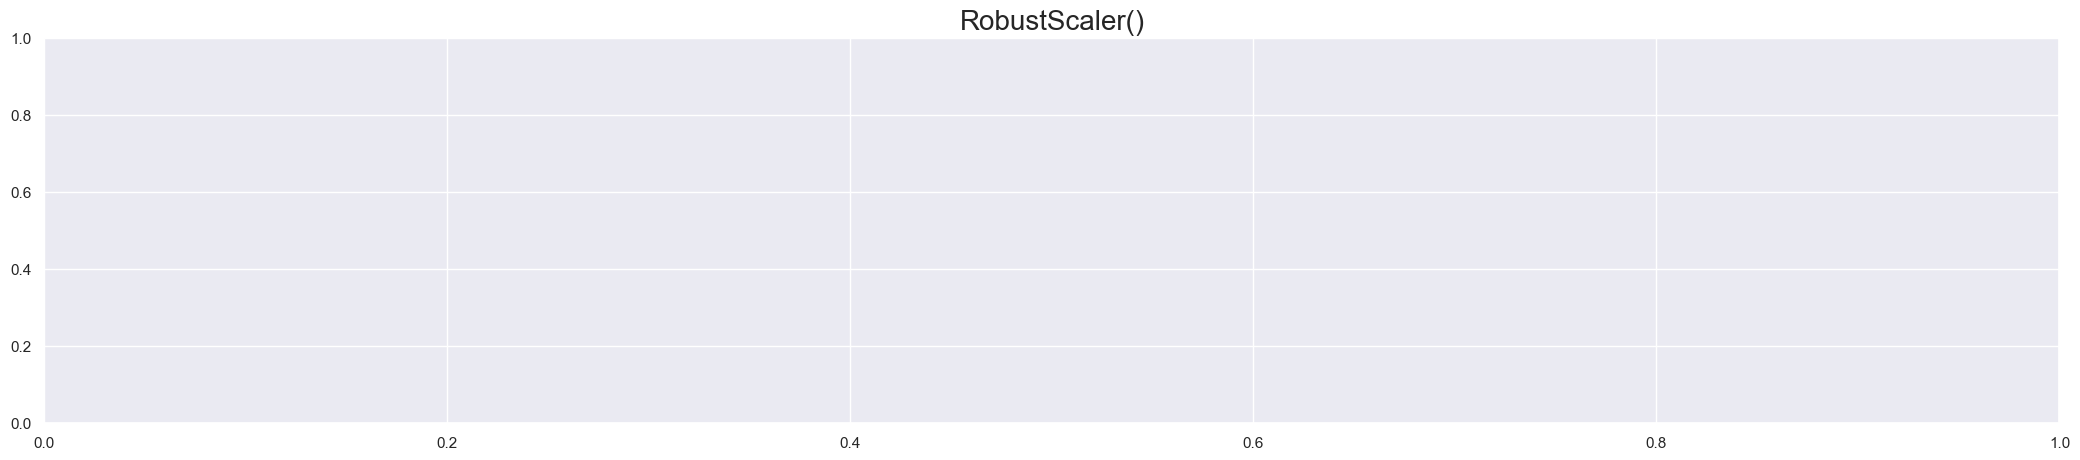

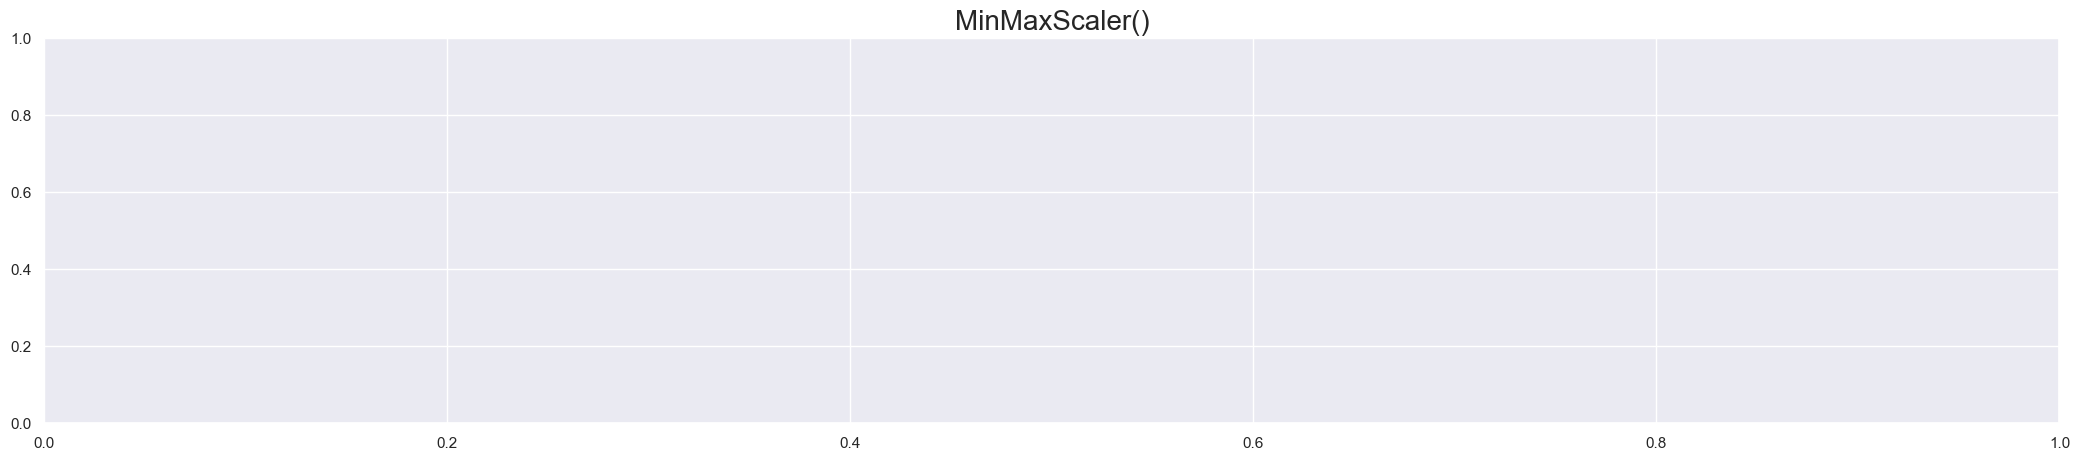

In [57]:
## data scaling methods ##
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
scale_var = []
scalers_list = [StandardScaler(), RobustScaler(), MinMaxScaler()]
for i in range(len(scalers_list)):
    scaler = scalers_list[i]
    fig = plt.figure(figsize = (26, 5))
    plt.title(scaler, fontsize = 20)
    for j in range(len(scale_var)):
        var = scale_var[j]
        scaled_var = "scaled_" + var
        model = scaler.fit(cocacola[var].values.reshape(-1,1))
        cocacola[scaled_var] = model.transform(cocacola[var].values.reshape(-1, 1))
        sub = fig.add_subplot(1, 5, j + 1)
        sub.set_xlabel(var)
        cocacola[scaled_var].plot(kind = 'hist')

# Model Building

In [58]:
from sklearn.metrics import mean_squared_error

# 1)Linear Model

In [59]:
linear_model =smf.ols("Sales~t",data =train).fit()
linear_pred = pd.Series(linear_model.predict(test['t']))
linear_rmse =np.sqrt(mean_squared_error(np.array(test['Sales']),np.array(linear_pred)))
linear_rmse

752.9233933232185

# 2)Quadratic Model

In [60]:
quad_model =smf.ols("Sales~t+t_squared",data=train).fit()
quad_pred = pd.Series(quad_model.predict(test[['t','t_squared']]))
quad_rmse =np.sqrt(mean_squared_error(np.array(test['Sales']),np.array(quad_pred)))
quad_rmse

457.73573555935064

# 3)Exponential Model

In [61]:
exp_model  =smf.ols("Sales_log~t",data=train).fit()
exp_pred =pd.Series(exp_model.predict(test['t']))
exp_rmse =np.sqrt(mean_squared_error(np.array(test['Sales']),np.array(exp_pred)))
exp_rmse

4387.940544839116

In [62]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_exp","rmse_quad"]),"RMSE_Values":pd.Series([linear_rmse,exp_rmse,quad_rmse,])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
2,rmse_quad,457.735736
0,rmse_linear,752.923393
1,rmse_exp,4387.940545


# Checking Stationarity

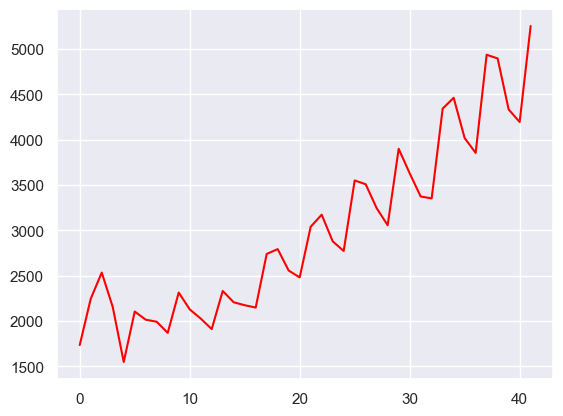

In [63]:
plt.plot(cocacola['Sales'],color='red')

Looking at the plot we can observe there is an upward trend over the period of time.

In [64]:
#Plot the histogram

(array([ 4., 10.,  5.,  4.,  6.,  3.,  3.,  4.,  0.,  3.]),
 array([1547.818996 , 1918.3370964, 2288.8551968, 2659.3732972,
        3029.8913976, 3400.409498 , 3770.9275984, 4141.4456988,
        4511.9637992, 4882.4818996, 5253.       ]),
 <BarContainer object of 10 artists>)

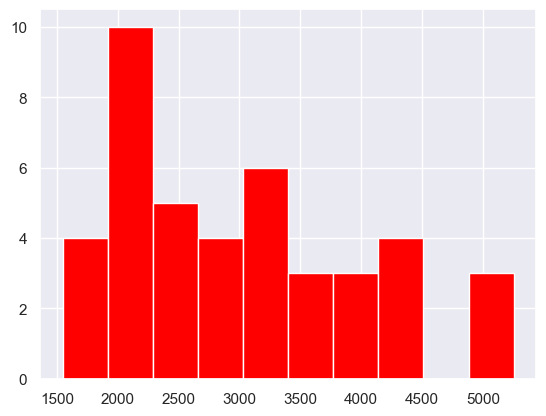

In [65]:
plt.hist(cocacola['Sales'],color='red')

# Using ARIMA Model

In [66]:
data=pd.read_csv(r"D:\ExcelR Solution\Data Science\Assignments\Assignment No-18-Forecasting\CocaCola_Sales_Rawdata.csv",header=0,index_col=0,parse_dates=True)

In [67]:
data

,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996
Q2_87,2104.411995
Q3_87,2014.362999
Q4_87,1991.746998
Q1_88,1869.049999


# separate out a validation dataset


In [68]:
split_point = len(data) - 7
dataset_cc, validation_cc = data[0:split_point], data[split_point:]
print('Dataset_cc %d, Validation_cc %d' % (len(dataset_cc), len(validation_cc)))

Dataset_cc 35, Validation_cc 7


In [69]:
dataset_cc.to_csv('dataset_cc.csv', header=False)
validation_cc.to_csv('validation_cc.csv', header=False)

In [70]:
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt

train = read_csv('dataset_cc.csv', header=None, index_col=0, parse_dates=True, squeeze=True)

train

0
Q1_86    1734.827000
Q2_86    2244.960999
Q3_86    2533.804993
Q4_86    2154.962997
Q1_87    1547.818996
Q2_87    2104.411995
Q3_87    2014.362999
Q4_87    1991.746998
Q1_88    1869.049999
Q2_88    2313.631996
Q3_88    2128.320000
Q4_88    2026.828999
Q1_89    1910.603996
Q2_89    2331.164993
Q3_89    2206.549995
Q4_89    2173.967995
Q1_90    2148.278000
Q2_90    2739.307999
Q3_90    2792.753998
Q4_90    2556.009995
Q1_91    2480.973999
Q2_91    3039.522995
Q3_91    3172.115997
Q4_91    2879.000999
Q1_92    2772.000000
Q2_92    3550.000000
Q3_92    3508.000000
Q4_92    3243.859993
Q1_93    3056.000000
Q2_93    3899.000000
Q3_93    3629.000000
Q4_93    3373.000000
Q1_94    3352.000000
Q2_94    4342.000000
Q3_94    4461.000000
Name: 1, dtype: float64

In [71]:
X = train.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

In [72]:
X

array([1734.827 , 2244.961 , 2533.805 , 2154.963 , 1547.819 , 2104.412 ,
       2014.363 , 1991.747 , 1869.05  , 2313.632 , 2128.32  , 2026.829 ,
       1910.604 , 2331.165 , 2206.55  , 2173.968 , 2148.278 , 2739.308 ,
       2792.754 , 2556.01  , 2480.9739, 3039.523 , 3172.116 , 2879.001 ,
       2772.    , 3550.    , 3508.    , 3243.86  , 3056.    , 3899.    ,
       3629.    , 3373.    , 3352.    , 4342.    , 4461.    ],
      dtype=float32)

In [73]:
train_size

17

In [74]:
test

array([2739.308 , 2792.754 , 2556.01  , 2480.9739, 3039.523 , 3172.116 ,
       2879.001 , 2772.    , 3550.    , 3508.    , 3243.86  , 3056.    ,
       3899.    , 3629.    , 3373.    , 3352.    , 4342.    , 4461.    ],
      dtype=float32)

# validation

In [75]:
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=2148.278, Expected=2739.308
>Predicted=2739.308, Expected=2792.754
>Predicted=2792.754, Expected=2556.010
>Predicted=2556.010, Expected=2480.974
>Predicted=2480.974, Expected=3039.523
>Predicted=3039.523, Expected=3172.116
>Predicted=3172.116, Expected=2879.001
>Predicted=2879.001, Expected=2772.000
>Predicted=2772.000, Expected=3550.000
>Predicted=3550.000, Expected=3508.000
>Predicted=3508.000, Expected=3243.860
>Predicted=3243.860, Expected=3056.000
>Predicted=3056.000, Expected=3899.000
>Predicted=3899.000, Expected=3629.000
>Predicted=3629.000, Expected=3373.000
>Predicted=3373.000, Expected=3352.000
>Predicted=3352.000, Expected=4342.000
>Predicted=4342.000, Expected=4461.000
RMSE: 434.401


In [76]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_exp","rmse_quad","RMSE_ARIMA"]),"RMSE_Values":pd.Series([linear_rmse,exp_rmse,quad_rmse,rmse])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
3,RMSE_ARIMA,434.400665
2,rmse_quad,457.735736
0,rmse_linear,752.923393
1,rmse_exp,4387.940545


# 2)Airlines DataSet

# Problem Statement

In [77]:
#Importing Libraries

In [78]:
from pandas import read_csv
from matplotlib import pyplot
from numpy import sqrt
import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [79]:
df= pd.read_csv("D:\ExcelR Solution\Data Science\Assignments\Assignment No-18-Forecasting\Airlines+Data.csv")

In [80]:
df

,Month,Passengers
0,Jan-95,112
1,Feb-95,118
2,Mar-95,132
3,Apr-95,129
4,May-95,121
...,...,...
91,Aug-02,405
92,Sep-02,355
93,Oct-02,306
94,Nov-02,271


# Data Preprocessing

In [81]:
df.head(50)

,Month,Passengers
0,Jan-95,112
1,Feb-95,118
2,Mar-95,132
3,Apr-95,129
4,May-95,121
5,Jun-95,135
6,Jul-95,148
7,Aug-95,148
8,Sep-95,136
9,Oct-95,119


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       96 non-null     object
 1   Passengers  96 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


In [83]:
df.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [84]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Passengers,96.0,213.708333,71.918216,104.0,156.0,200.0,264.75,413.0


In [85]:
df.corr()

,Passengers
Passengers,1.0


In [86]:
df.dtypes

Month         object
Passengers     int64
dtype: object

In [87]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
91    False
92    False
93    False
94    False
95    False
Length: 96, dtype: bool

In [88]:
df.isna().sum()

Month         0
Passengers    0
dtype: int64

In [89]:
df.isnull().any()

Month         False
Passengers    False
dtype: bool

In [90]:
df.columns

Index(['Month', 'Passengers'], dtype='object')

In [91]:
len(df)

96

# Data Visualization

In [92]:
# line plot of time series

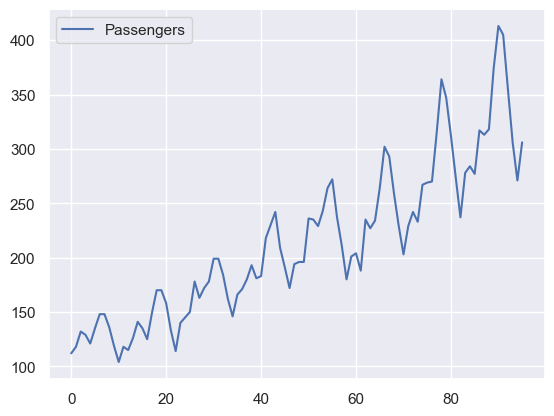

In [93]:
from pandas import read_csv
from matplotlib import pyplot
df.plot()
pyplot.show()

array([[<AxesSubplot:title={'center':'Passengers'}>]], dtype=object)

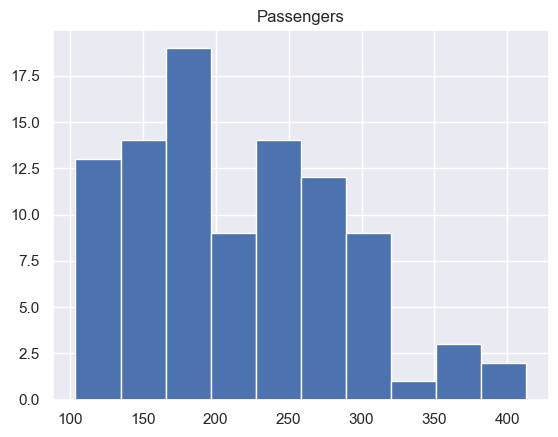

In [94]:
df.hist()

<AxesSubplot:ylabel='Density'>

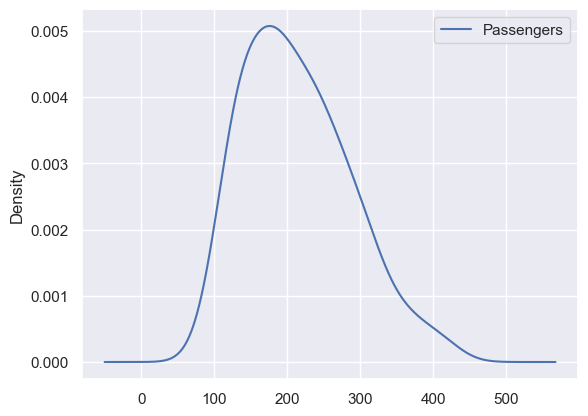

In [95]:
df.plot(kind='kde')

<AxesSubplot:xlabel='Passengers', ylabel='Density'>

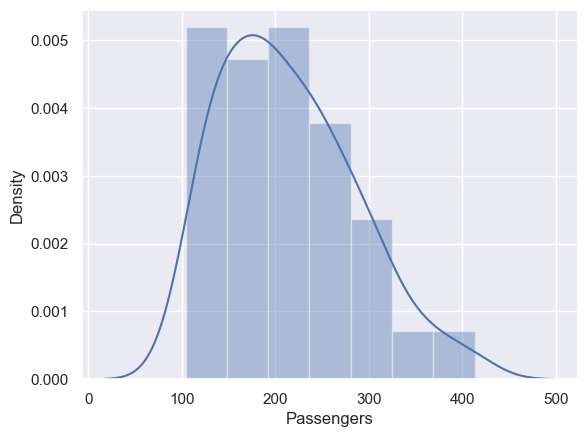

In [96]:
sns.distplot(df['Passengers'],kde=True)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

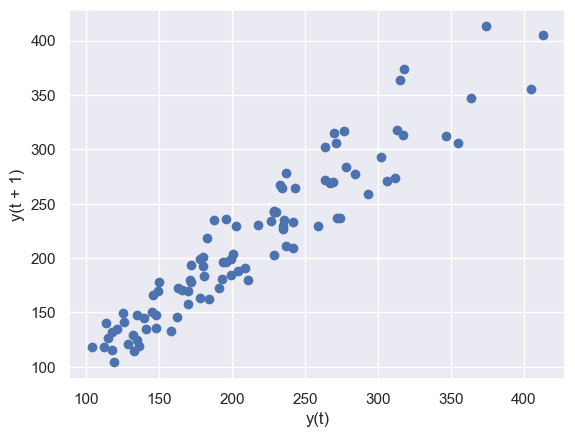

In [97]:
from pandas.plotting import lag_plot
lag_plot(df['Passengers'])

<AxesSubplot:xlabel='Passengers', ylabel='count'>

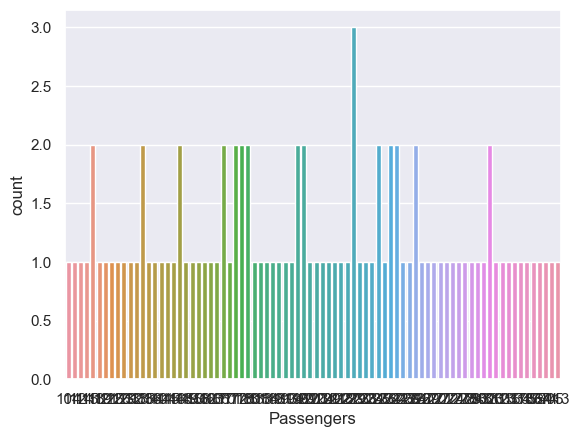

In [98]:
sns.countplot(data=df,x='Passengers')

<AxesSubplot:xlabel='Month', ylabel='Passengers'>

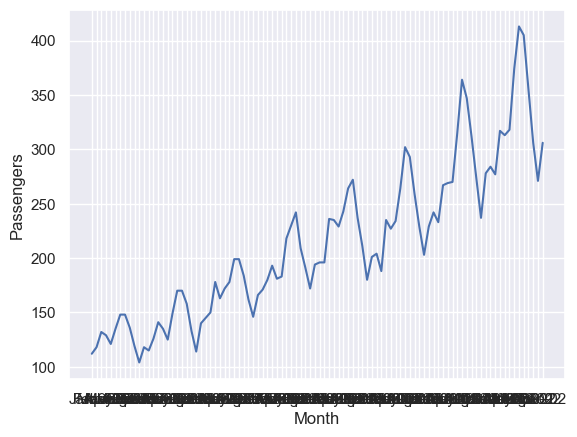

In [99]:
sns.lineplot(data=df, x='Month',y='Passengers')

<AxesSubplot:xlabel='Month', ylabel='Passengers'>

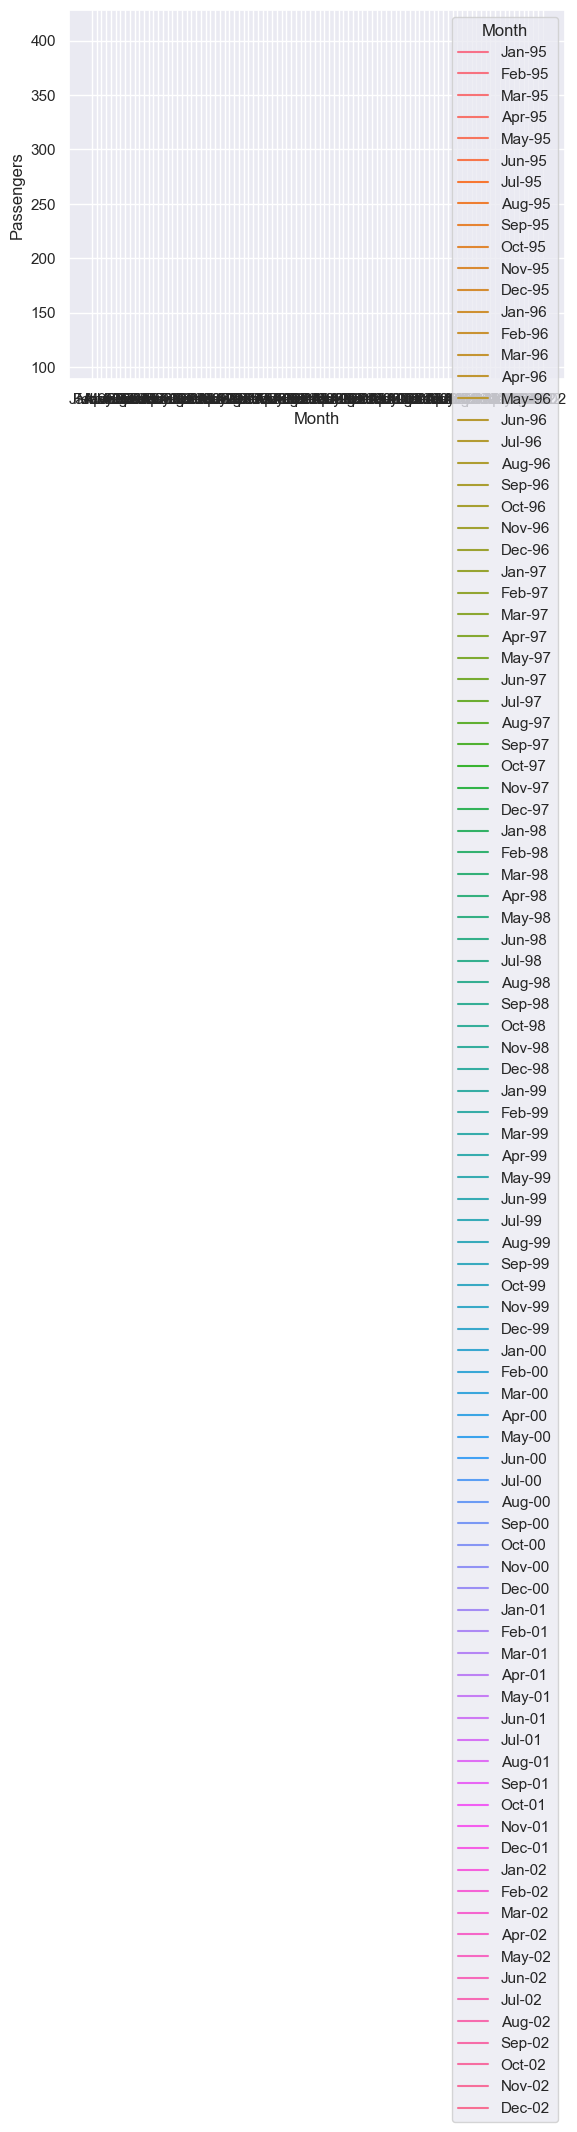

In [100]:
sns.lineplot(data=df, x='Month',y='Passengers',hue='Month')

<AxesSubplot:>

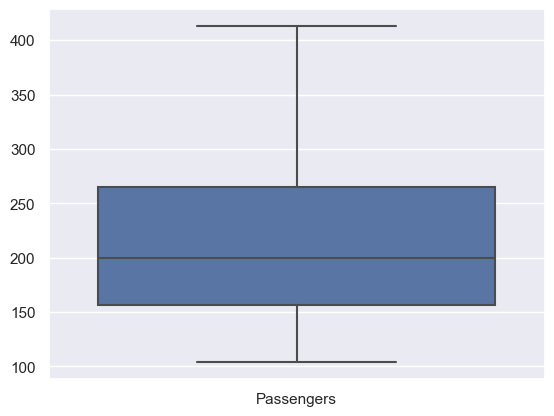

In [101]:
sns.boxplot(data=df)

<AxesSubplot:>

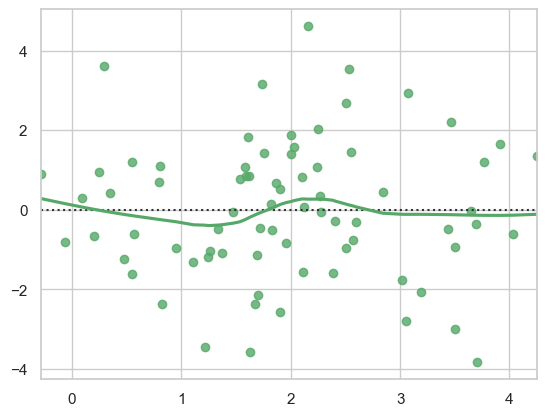

In [102]:
sns.set_theme(style="whitegrid")

# Make an example dataset with y ~ x
rs = np.random.RandomState(7)
x = rs.normal(2, 1, 75)
y = 2 + 1.5 * x + rs.normal(0, 2, 75)

# Plot the residuals after fitting a linear model
sns.residplot(x=x, y=y, lowess=True, color="g")


<AxesSubplot:xlabel='year', ylabel='month'>

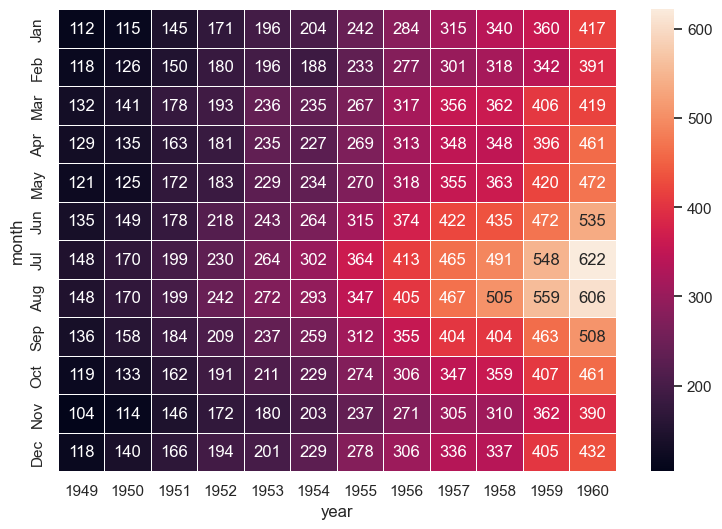

In [103]:
sns.set_theme()

# Load the example flights dataset and convert to long-form
flights_long = sns.load_dataset("flights")
flights = flights_long.pivot("month", "year", "passengers")

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5, ax=ax)

# Splitting Data

In [104]:
Train=df.head(90)
Test=df.tail(6)

In [105]:
Train

,Month,Passengers
0,Jan-95,112
1,Feb-95,118
2,Mar-95,132
3,Apr-95,129
4,May-95,121
...,...,...
85,Feb-02,277
86,Mar-02,317
87,Apr-02,313
88,May-02,318


In [106]:
Test

,Month,Passengers
90,Jul-02,413
91,Aug-02,405
92,Sep-02,355
93,Oct-02,306
94,Nov-02,271
95,Dec-02,306


# Moving Average

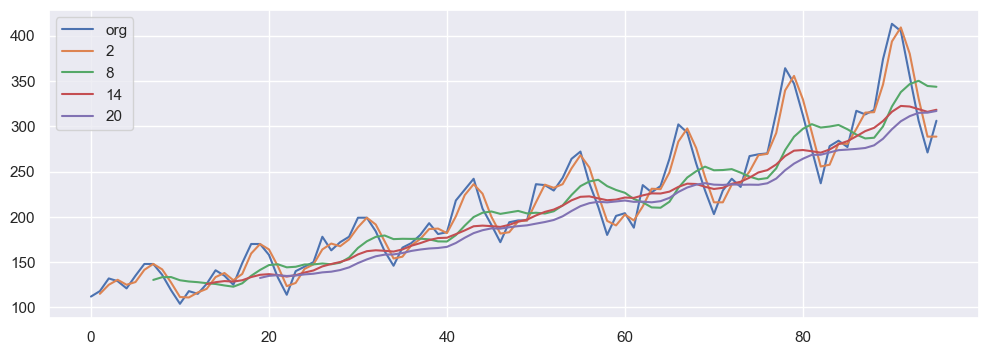

In [107]:
plt.figure(figsize=(12,4))
df.Passengers.plot(label="org")
for i in range(2,24,6):
    df['Passengers'].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

# Time series decomposition plot

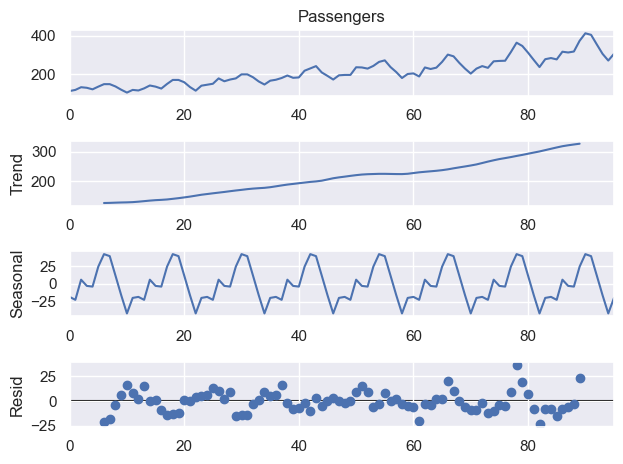

In [108]:
decompose_ts_add = seasonal_decompose(df.Passengers,period=12)
decompose_ts_add.plot()
plt.show()

# ACF plots and PACF plots

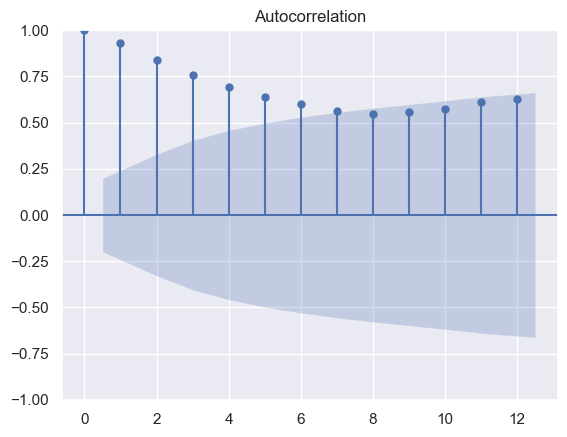

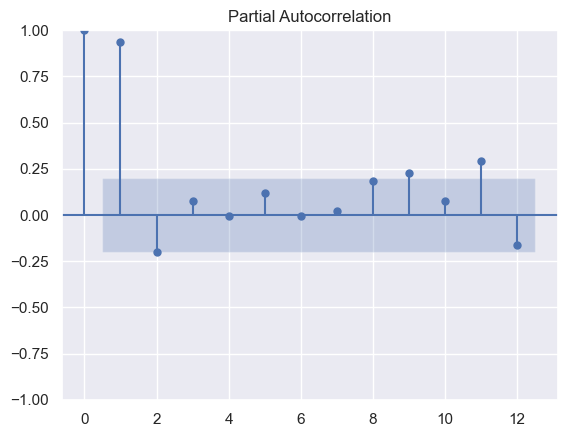

In [109]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(df.Passengers,lags=12)
tsa_plots.plot_pacf(df.Passengers,lags=12)
plt.show()

# Evaluation Metric MAPE

In [110]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

# Simple Exponential Method

In [111]:
ses_model = SimpleExpSmoothing(Train["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Passengers) 

13.161170526223485

In [112]:
# Holt method 
hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Passengers)

27.619306276788606

In [113]:
hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Passengers) 

2.3615570982662724

In [114]:
hwe_model_mul_add = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Passengers)

1.6208480518515398

In [115]:
#Final Model by combining train and test

In [116]:
hwe_model_add_add = ExponentialSmoothing(df["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit()

In [117]:
#Forecasting for next 10 time periods
hwe_model_add_add.forecast(10)

96     319.235250
97     311.528363
98     350.278666
99     346.984953
100    351.844997
101    403.925669
102    440.566746
103    427.446408
104    376.628091
105    329.767424
dtype: float64

# separate out a validation dataset

In [118]:
split_point = len(df) - 10

In [119]:
dataset, validation = df[0:split_point], df[split_point:]

In [120]:
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

Dataset 86, Validation 10


# Persistence/ Base model

In [121]:
#evaluate a persistence model
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt

In [122]:
#Load Data
train = read_csv("D:\ExcelR Solution\Data Science\Assignments\Assignment No-18-Forecasting\Airlines+Data.csv", header=None, index_col=0, parse_dates=True, squeeze=True)

In [123]:
# prepare data
X = train.values
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

In [124]:
train

array(['Passengers', '112', '118', '132', '129', '121', '135', '148',
       '148', '136', '119', '104', '118', '115', '126', '141', '135',
       '125', '149', '170', '170', '158', '133', '114', '140', '145',
       '150', '178', '163', '172', '178', '199', '199', '184', '162',
       '146', '166', '171', '180', '193', '181', '183', '218', '230',
       '242', '209', '191', '172'], dtype=object)

In [125]:
train_size

48

In [126]:
test

array(['194', '196', '196', '236', '235', '229', '243', '264', '272',
       '237', '211', '180', '201', '204', '188', '235', '227', '234',
       '264', '302', '293', '259', '229', '203', '229', '242', '233',
       '267', '269', '270', '315', '364', '347', '312', '274', '237',
       '278', '284', '277', '317', '313', '318', '374', '413', '405',
       '355', '306', '271', '306'], dtype=object)

In [127]:
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)

In [128]:
history

['Passengers',
 '112',
 '118',
 '132',
 '129',
 '121',
 '135',
 '148',
 '148',
 '136',
 '119',
 '104',
 '118',
 '115',
 '126',
 '141',
 '135',
 '125',
 '149',
 '170',
 '170',
 '158',
 '133',
 '114',
 '140',
 '145',
 '150',
 '178',
 '163',
 '172',
 '178',
 '199',
 '199',
 '184',
 '162',
 '146',
 '166',
 '171',
 '180',
 '193',
 '181',
 '183',
 '218',
 '230',
 '242',
 '209',
 '191',
 '172',
 '194',
 '196',
 '196',
 '236',
 '235',
 '229',
 '243',
 '264',
 '272',
 '237',
 '211',
 '180',
 '201',
 '204',
 '188',
 '235',
 '227',
 '234',
 '264',
 '302',
 '293',
 '259',
 '229',
 '203',
 '229',
 '242',
 '233',
 '267',
 '269',
 '270',
 '315',
 '364',
 '347',
 '312',
 '274',
 '237',
 '278',
 '284',
 '277',
 '317',
 '313',
 '318',
 '374',
 '413',
 '405',
 '355',
 '306',
 '271',
 '306']

In [129]:
predictions

['172',
 '194',
 '196',
 '196',
 '236',
 '235',
 '229',
 '243',
 '264',
 '272',
 '237',
 '211',
 '180',
 '201',
 '204',
 '188',
 '235',
 '227',
 '234',
 '264',
 '302',
 '293',
 '259',
 '229',
 '203',
 '229',
 '242',
 '233',
 '267',
 '269',
 '270',
 '315',
 '364',
 '347',
 '312',
 '274',
 '237',
 '278',
 '284',
 '277',
 '317',
 '313',
 '318',
 '374',
 '413',
 '405',
 '355',
 '306',
 '271']

In [130]:
yhat

'271'

In [131]:
obs

'306'

In [132]:
# report performance

In [133]:
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

RMSE: 28.640


# Transformations 

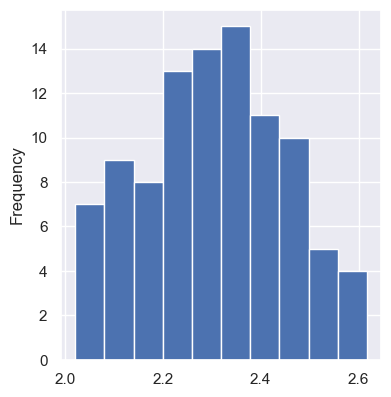

In [134]:
## log transformation - power law distribution ##
log_var = ['Passengers']
fig = plt.figure(figsize = (24,10))

for j in range(len(log_var)):
    var = log_var[j]
    transformed = "log_" + var
    df[transformed] = np.log10(df[var]+1)
    sub = fig.add_subplot(2, 5, j + 1)
    df[transformed].plot(kind = 'hist')

count     96.000000
mean     213.708333
std       71.918216
min      104.000000
25%      156.000000
50%      200.000000
75%      264.750000
max      413.000000
Name: Passengers, dtype: float64
count     96.000000
mean     212.260417
std       67.488829
min      118.000000
25%      156.000000
50%      200.000000
75%      264.750000
max      349.000000
Name: clipped_Passengers, dtype: float64


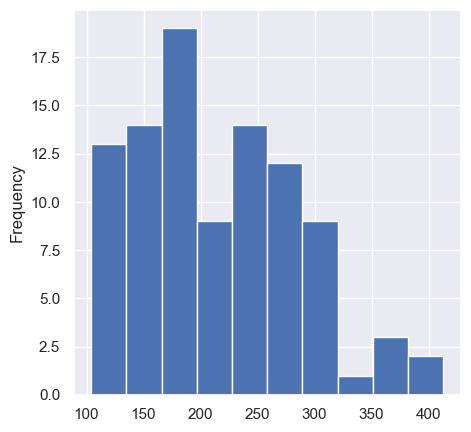

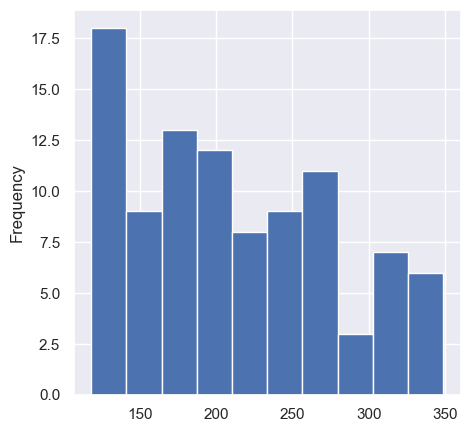

In [135]:
# clipping methods - handle outliers ##
clip_var=['Passengers']
for i in clip_var:
    transformed = 'clipped_'+ i
# upper limit - .95 quantile
    upper_limit = df[i].quantile(0.95)
# lower limit - .05 quantile
    lower_limit = df[i].quantile(0.05)
    df[transformed] =df[i].clip(lower_limit, upper_limit, axis = 0)
    
    print(df[i].describe())
    print(df[transformed].describe())
    
    plt.figure(figsize = (5,5))
    df[i].plot(kind = 'hist')
    
    plt.figure(figsize = (5,5))
    df[transformed].plot(kind = 'hist')

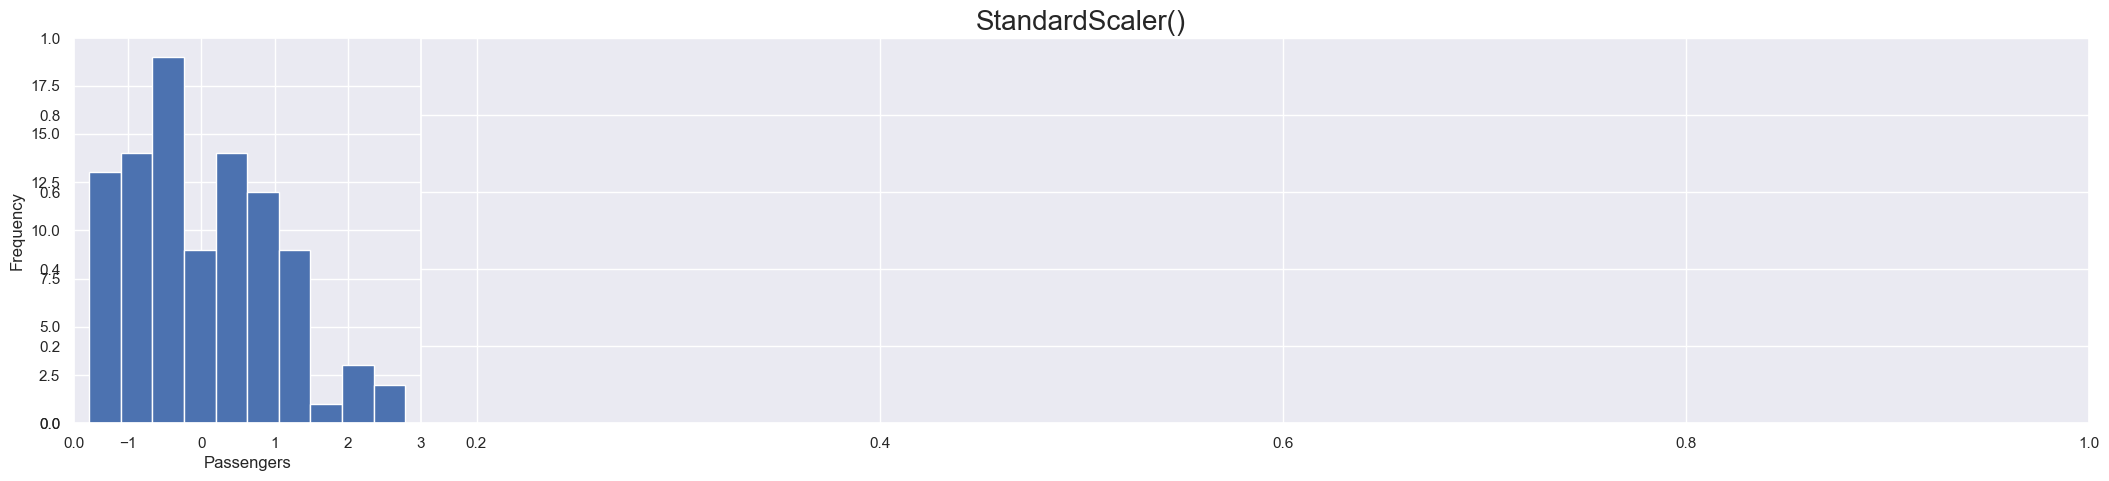

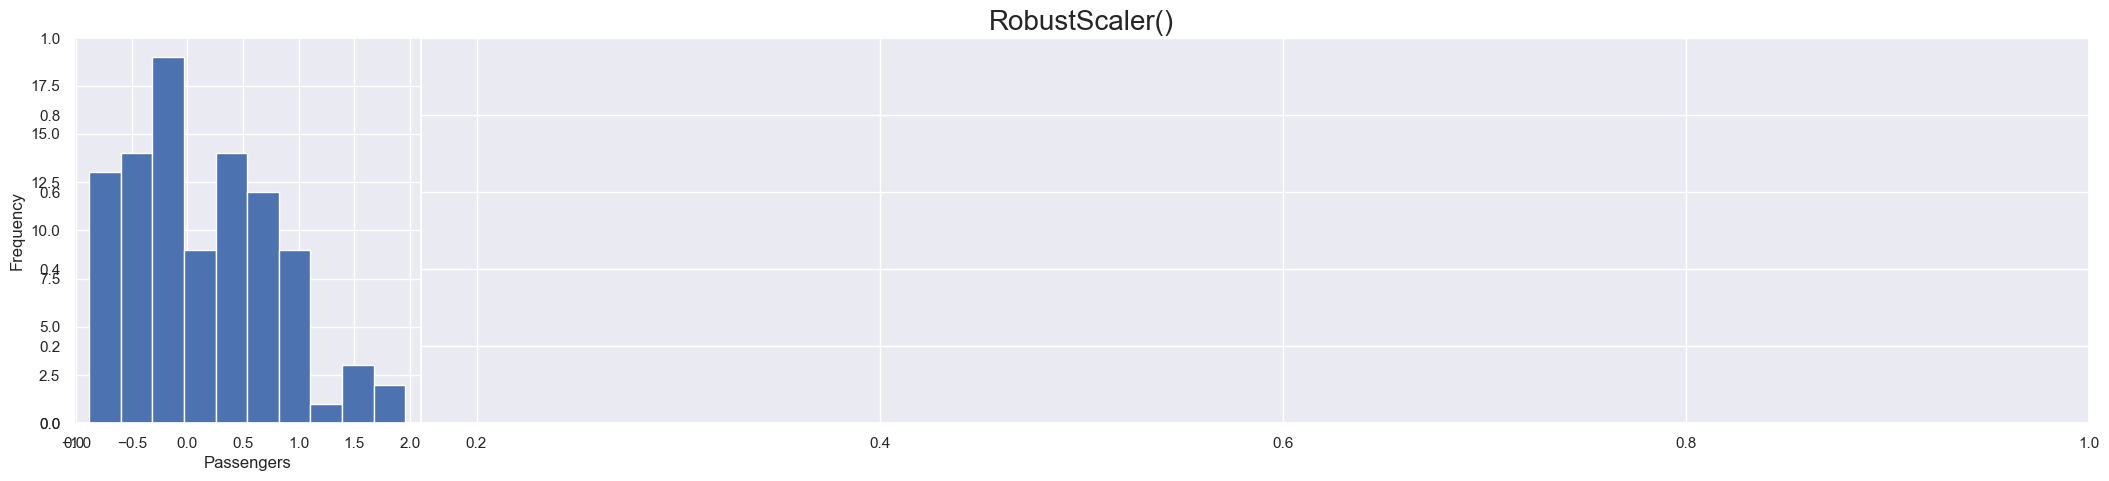

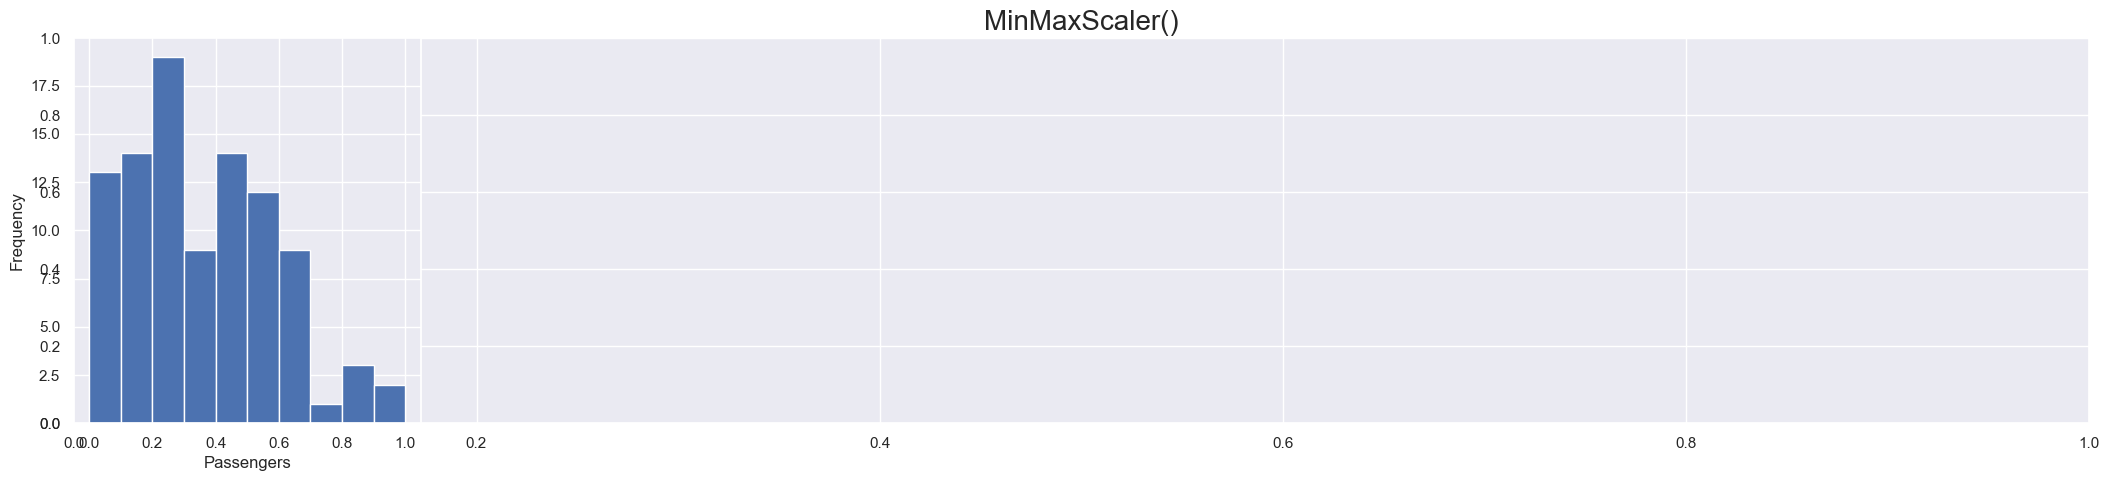

In [136]:
## data scaling methods ##
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
scale_var = ['Passengers']
scalers_list = [StandardScaler(), RobustScaler(), MinMaxScaler()]
for i in range(len(scalers_list)):
    scaler = scalers_list[i]
    fig = plt.figure(figsize = (26, 5))
    plt.title(scaler, fontsize = 20)
    for j in range(len(scale_var)):
        var = scale_var[j]
        scaled_var = "scaled_" + var
        model = scaler.fit(df[var].values.reshape(-1,1))
        df[scaled_var] = model.transform(df[var].values.reshape(-1, 1))
        sub = fig.add_subplot(1, 5, j + 1)
        sub.set_xlabel(var)
        df[scaled_var].plot(kind = 'hist')

# Checking Stationarity

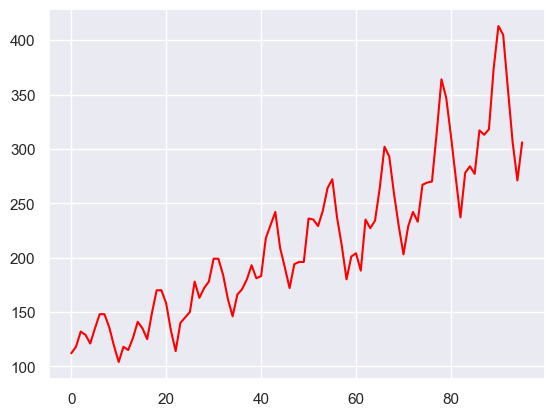

In [137]:
plt.plot(df['Passengers'],color='red')

(array([13., 14., 19.,  9., 14., 12.,  9.,  1.,  3.,  2.]),
 array([104. , 134.9, 165.8, 196.7, 227.6, 258.5, 289.4, 320.3, 351.2,
        382.1, 413. ]),
 <BarContainer object of 10 artists>)

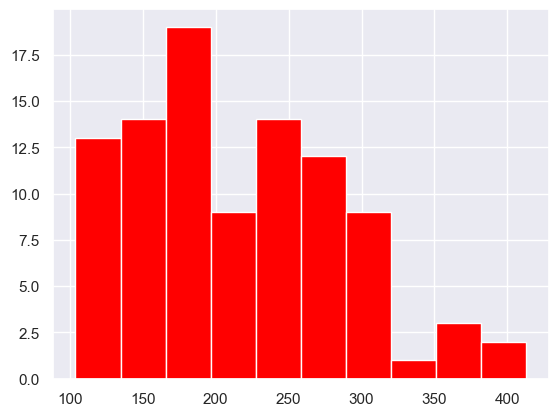

In [138]:
plt.hist(df['Passengers'],color='red')

# ARIMA Hyperparameters

In [139]:
# grid search ARIMA

In [140]:
import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

In [141]:
# evaluate an ARIMA model for a given order (p,d,q) and return RMSE

In [142]:
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    X=X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        # model_fit = model.fit(disp=0)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
        # calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

In [143]:
X

array(['Passengers', '112', '118', '132', '129', '121', '135', '148',
       '148', '136', '119', '104', '118', '115', '126', '141', '135',
       '125', '149', '170', '170', '158', '133', '114', '140', '145',
       '150', '178', '163', '172', '178', '199', '199', '184', '162',
       '146', '166', '171', '180', '193', '181', '183', '218', '230',
       '242', '209', '191', '172', '194', '196', '196', '236', '235',
       '229', '243', '264', '272', '237', '211', '180', '201', '204',
       '188', '235', '227', '234', '264', '302', '293', '259', '229',
       '203', '229', '242', '233', '267', '269', '270', '315', '364',
       '347', '312', '274', '237', '278', '284', '277', '317', '313',
       '318', '374', '413', '405', '355', '306', '271', '306'],
      dtype=object)

In [144]:
train_size

48

In [145]:
train

array(['Passengers', '112', '118', '132', '129', '121', '135', '148',
       '148', '136', '119', '104', '118', '115', '126', '141', '135',
       '125', '149', '170', '170', '158', '133', '114', '140', '145',
       '150', '178', '163', '172', '178', '199', '199', '184', '162',
       '146', '166', '171', '180', '193', '181', '183', '218', '230',
       '242', '209', '191', '172'], dtype=object)

In [146]:
test

array(['194', '196', '196', '236', '235', '229', '243', '264', '272',
       '237', '211', '180', '201', '204', '188', '235', '227', '234',
       '264', '302', '293', '259', '229', '203', '229', '242', '233',
       '267', '269', '270', '315', '364', '347', '312', '274', '237',
       '278', '284', '277', '317', '313', '318', '374', '413', '405',
       '355', '306', '271', '306'], dtype=object)

In [147]:
history

['Passengers',
 '112',
 '118',
 '132',
 '129',
 '121',
 '135',
 '148',
 '148',
 '136',
 '119',
 '104',
 '118',
 '115',
 '126',
 '141',
 '135',
 '125',
 '149',
 '170',
 '170',
 '158',
 '133',
 '114',
 '140',
 '145',
 '150',
 '178',
 '163',
 '172',
 '178',
 '199',
 '199',
 '184',
 '162',
 '146',
 '166',
 '171',
 '180',
 '193',
 '181',
 '183',
 '218',
 '230',
 '242',
 '209',
 '191',
 '172',
 '194',
 '196',
 '196',
 '236',
 '235',
 '229',
 '243',
 '264',
 '272',
 '237',
 '211',
 '180',
 '201',
 '204',
 '188',
 '235',
 '227',
 '234',
 '264',
 '302',
 '293',
 '259',
 '229',
 '203',
 '229',
 '242',
 '233',
 '267',
 '269',
 '270',
 '315',
 '364',
 '347',
 '312',
 '274',
 '237',
 '278',
 '284',
 '277',
 '317',
 '313',
 '318',
 '374',
 '413',
 '405',
 '355',
 '306',
 '271',
 '306']

In [148]:
predictions

['172',
 '194',
 '196',
 '196',
 '236',
 '235',
 '229',
 '243',
 '264',
 '272',
 '237',
 '211',
 '180',
 '201',
 '204',
 '188',
 '235',
 '227',
 '234',
 '264',
 '302',
 '293',
 '259',
 '229',
 '203',
 '229',
 '242',
 '233',
 '267',
 '269',
 '270',
 '315',
 '364',
 '347',
 '312',
 '274',
 '237',
 '278',
 '284',
 '277',
 '317',
 '313',
 '318',
 '374',
 '413',
 '405',
 '355',
 '306',
 '271']

In [149]:
rmse

28.639917911180955

# Grid search for p,d,q values

In [150]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [151]:
# load dataset
train = read_csv("D:\ExcelR Solution\Data Science\Assignments\Assignment No-18-Forecasting\Airlines+Data.csv", header=None, index_col=0, parse_dates=True, squeeze=True)
# evaluate parameters
#p_values = range(0, 5)
#d_values = range(0, 5)
#q_values = range(0, 5)
warnings.filterwarnings("ignore")
#evaluate_models(train.values, p_values, d_values, q_values)

In [152]:
train

0
Month     Passengers
Jan-95           112
Feb-95           118
Mar-95           132
Apr-95           129
             ...    
Aug-02           405
Sep-02           355
Oct-02           306
Nov-02           271
Dec-02           306
Name: 1, Length: 97, dtype: object

# Build Model based on the optimized values

In [153]:
# save finalized model to file
from pandas import datetime
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
import numpy as np
import pandas as pd
from numpy import sqrt
from sklearn.metrics import mean_squared_error
from math import sqrt

In [154]:
# load data
train = read_csv("D:\ExcelR Solution\Data Science\Assignments\Assignment No-18-Forecasting\Airlines+Data.csv", header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values

In [155]:
X

array([[112],
       [118],
       [132],
       [129],
       [121],
       [135],
       [148],
       [148],
       [136],
       [119],
       [104],
       [118],
       [115],
       [126],
       [141],
       [135],
       [125],
       [149],
       [170],
       [170],
       [158],
       [133],
       [114],
       [140],
       [145],
       [150],
       [178],
       [163],
       [172],
       [178],
       [199],
       [199],
       [184],
       [162],
       [146],
       [166],
       [171],
       [180],
       [193],
       [181],
       [183],
       [218],
       [230],
       [242],
       [209],
       [191],
       [172],
       [194],
       [196],
       [196],
       [236],
       [235],
       [229],
       [243],
       [264],
       [272],
       [237],
       [211],
       [180],
       [201],
       [204],
       [188],
       [235],
       [227],
       [234],
       [264],
       [302],
       [293],
       [259],
       [229],
       [203],
      

In [156]:
#fit model
model=ARIMA(train.values,order=(3,1,0))

In [157]:
modelfit=model.fit()

In [158]:
modelfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   96
Model:                 ARIMA(3, 1, 0)   Log Likelihood                -427.616
Date:                Thu, 05 Jan 2023   AIC                            863.231
Time:                        10:38:30   BIC                            873.447
Sample:                             0   HQIC                           867.359
                                 - 96                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3027      0.109      2.770      0.006       0.088       0.517
ar.L2         -0.2125      0.135     -1.579      0.114      -0.476       0.051
ar.L3         -0.1025      0.098     -1.043      0.297      -0.295       0.090
sigma2       474.4437     83.151      5.706      0.000     311.471     637.416
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                 4.30
Prob(Q):                              0.72   Prob(JB):                         0.12
Heteroskedasticity (H):               4.05   Skew:                             0.48
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [159]:
#Error on the test data
val=pd.read_csv("D:\ExcelR Solution\Data Science\Assignments\Assignment No-18-Forecasting\Airlines+Data.csv",header=None)

In [160]:
 val

,0,1
0,Month,Passengers
1,Jan-95,112
2,Feb-95,118
3,Mar-95,132
4,Apr-95,129
...,...,...
92,Aug-02,405
93,Sep-02,355
94,Oct-02,306
95,Nov-02,271


In [161]:
rmse

28.639917911180955

# Combine train and test data and build final model

In [162]:
# fit model
data = pd.read_csv("D:\ExcelR Solution\Data Science\Assignments\Assignment No-18-Forecasting\Airlines+Data.csv", header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values

In [163]:
model = ARIMA(train.values,order=(3,1,0))

In [164]:
model

In [165]:
modelfit=model.fit()

In [166]:
modelfit

In [167]:
forecast=modelfit.forecast(steps=10)[0]

In [168]:
forecast

329.05318576546756